In [1]:
import nibabel as nib
import numpy as np

path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/rh.betas_session01.mgh"

img = nib.load(path)
data = img.get_fdata()  # shape: (vertices, 1, 1, stimuli)
data_reshaped = data.reshape(data.shape[0], data.shape[3]).T  # shape: (stimuli, vertices)
print("Shape after reshape:", data_reshaped.shape)


Shape after reshape: (750, 163842)


In [2]:
from sklearn.decomposition import PCA

n_components = 100
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data_reshaped)

print("Encoded shape:", X_pca.shape)
print("Explained variance ratio (first 10):", pca.explained_variance_ratio_[:10])
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))


Encoded shape: (750, 100)
Explained variance ratio (first 10): [0.05334477 0.04698551 0.03531625 0.02721649 0.02145335 0.02047172
 0.01940362 0.01686613 0.01505302 0.01345539]
Total explained variance: 0.6567909112607051


In [3]:
labels = np.tile(np.arange(75), 10)  # shape: (750,)


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define your labels — assuming it's already a list or array of shape (750,)
# Example: labels = np.tile(np.arange(75), 10)  # if each stimulus repeated 10 times
# Make sure to match the order of data_reshaped

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42, stratify=labels)

# Train linear SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", acc)
print(classification_report(y_test, y_pred))


Test Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       2.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       2.0
           7       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       2.0
          11       0.00      0.00      0.00       2.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       2.0
        

/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_pca is shape (750, 100)
labels = np.tile(np.arange(75), 10)  # shape (750,)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42, stratify=labels)

# SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       2.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       2.0
           7       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       2.0
          11       0.00      0.00      0.00       2.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       2.0
          17 

/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

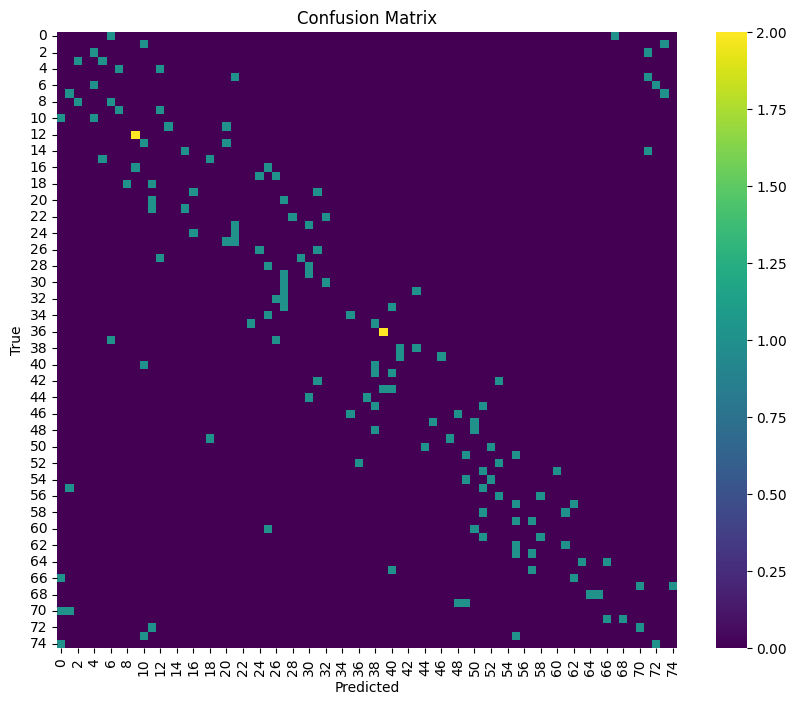

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [7]:
import numpy as np
from collections import Counter

labels = np.tile(np.arange(75), 10)  # shape (750,)
print(Counter(labels))


Counter({np.int64(0): 10, np.int64(1): 10, np.int64(2): 10, np.int64(3): 10, np.int64(4): 10, np.int64(5): 10, np.int64(6): 10, np.int64(7): 10, np.int64(8): 10, np.int64(9): 10, np.int64(10): 10, np.int64(11): 10, np.int64(12): 10, np.int64(13): 10, np.int64(14): 10, np.int64(15): 10, np.int64(16): 10, np.int64(17): 10, np.int64(18): 10, np.int64(19): 10, np.int64(20): 10, np.int64(21): 10, np.int64(22): 10, np.int64(23): 10, np.int64(24): 10, np.int64(25): 10, np.int64(26): 10, np.int64(27): 10, np.int64(28): 10, np.int64(29): 10, np.int64(30): 10, np.int64(31): 10, np.int64(32): 10, np.int64(33): 10, np.int64(34): 10, np.int64(35): 10, np.int64(36): 10, np.int64(37): 10, np.int64(38): 10, np.int64(39): 10, np.int64(40): 10, np.int64(41): 10, np.int64(42): 10, np.int64(43): 10, np.int64(44): 10, np.int64(45): 10, np.int64(46): 10, np.int64(47): 10, np.int64(48): 10, np.int64(49): 10, np.int64(50): 10, np.int64(51): 10, np.int64(52): 10, np.int64(53): 10, np.int64(54): 10, np.int64(55